<a href="https://colab.research.google.com/github/mdkennedy3/Useful_Robotics_Scripts/blob/master/Homography_image_rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homography Transform of Image

The goal of this script is to take in a roll, pitch and yaw angle and rotate an image. In this final image, the original image should be transformed as a homography to the specified orientation.

If the input image has m pixel width and n pixel height, then the final image should be a square image whose boarders of length $\sqrt{2} \max(m,n)$.

The proposed algorithm assumes a rectified image, with visible points a unit length in front of the projection plane, and that rotation of these points as a rigid body about the centroid of the image is occuring based on the specified roll, pitch and yaw values.

Given the rigid body rotation about this center point in world coordinates, this generates transformed points in the world coordinates after this rotation which are then re-projected back into the camera frame and drawn on the new final large square image whose dimensions are specifed above.

Here's a step-by-step explanation of the script:

1. **Image Loading and Preparation**: The script reads the input image and calculates the size of the new canvas, ensuring it's large enough to contain the rotated image.

2. **Rotation Matrices Calculation**: It converts the roll, pitch, and yaw angles from degrees to radians and computes the corresponding rotation matrices.

3. **3D Rotation**: The script defines points in the image plane, extends them to 3D with a unit length in front of the projection plane, and rotates these points around the image center.

4. **Homography Calculation and Image Warping**: It projects the rotated points back into 2D, calculates the homography matrix, and applies this homography to warp the image accordingly.

5. **Result Display**: Finally, it displays the rotated image using Matplotlib.


In [ ]:
# Install the necessary libraries
!pip install opencv-python-headless numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image


Saving dartboard.png to dartboard (17).png


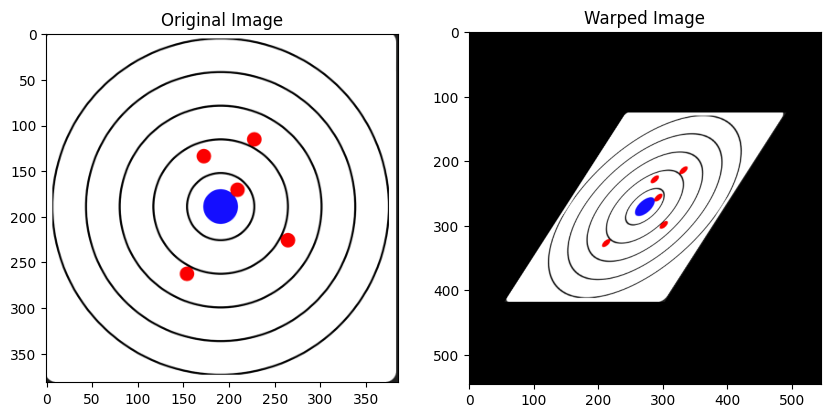

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, roll, pitch, yaw):
    # Get image dimensions
    h, w = image.shape[:2]

    # Calculate new image size
    max_dim = max(w, h)
    new_dim = int(np.ceil(np.sqrt(2) * max_dim))

    # Center the image on a larger canvas
    canvas = np.zeros((new_dim, new_dim, 3), dtype=np.uint8)
    x_offset = (new_dim - w) // 2
    y_offset = (new_dim - h) // 2
    canvas[y_offset:y_offset+h, x_offset:x_offset+w] = image

    # Convert degrees to radians
    roll = np.deg2rad(roll)
    pitch = np.deg2rad(pitch)
    yaw = np.deg2rad(yaw)

    # Compute rotation matrices
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(roll), -np.sin(roll)],
                   [0, np.sin(roll), np.cos(roll)]])

    Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                   [0, 1, 0],
                   [-np.sin(pitch), 0, np.cos(pitch)]])

    Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                   [np.sin(yaw), np.cos(yaw), 0],
                   [0, 0, 1]])

    R = Rz @ Ry @ Rx

    # Define points in the image plane
    points = np.array([[x_offset, y_offset],
                       [x_offset + w, y_offset],
                       [x_offset + w, y_offset + h],
                       [x_offset, y_offset + h]], dtype=np.float32)

    # Add a third dimension (z) with value 1 (unit length in front of the projection plane)
    points_3d = np.hstack((points, np.ones((4, 1))))

    # Rotate points around the image center
    image_center = np.array([new_dim / 2, new_dim / 2, 0])
    rotated_points_3d = (points_3d - image_center) @ R.T + image_center

    # Project rotated points back into 2D
    rotated_points_2d = rotated_points_3d[:, :2]

    # Calculate homography
    H, _ = cv2.findHomography(points, rotated_points_2d)

    # Warp the image using the homography
    rotated_image = cv2.warpPerspective(canvas, H, (new_dim, new_dim))

    return rotated_image


# Example usage
# Upload an image
uploaded = files.upload()

# Load the image
filename = next(iter(uploaded))
image = cv2.imread(filename)

# Set roll, pitch, yaw angles
roll = 40   # Roll angle in degrees (-89:89 deg) (rotate about image x axis - width)
pitch = -50  # Pitch angle in degrees (-89:89 deg) (rotate about image y axis - height)
yaw = 0  # Yaw angle in degrees (0:360 deg) (rotate in plane)

# Rotate the image
rotated_image = rotate_image(image, roll, pitch, yaw)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Warped Image')
plt.imshow(rotated_image)
plt.show()


if you would like to save:

In [ ]:
# Save the warped image
warped_filename = 'warped_image.jpg'
cv2.imwrite(warped_filename, rotated_image)

# Display a link to download the warped image
files.download(warped_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Slider for active selection:
Here you can use a slider for active selection

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
from google.colab import files

def rotate_image(image, roll, pitch, yaw):
    h, w = image.shape[:2]
    max_dim = max(w, h)
    new_dim = int(np.ceil(np.sqrt(2) * max_dim))
    canvas = np.zeros((new_dim, new_dim, 3), dtype=np.uint8)
    x_offset = (new_dim - w) // 2
    y_offset = (new_dim - h) // 2
    canvas[y_offset:y_offset+h, x_offset:x_offset+w] = image
    roll = np.deg2rad(roll)
    pitch = np.deg2rad(pitch)
    yaw = np.deg2rad(yaw)
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(roll), -np.sin(roll)],
                   [0, np.sin(roll), np.cos(roll)]])
    Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                   [0, 1, 0],
                   [-np.sin(pitch), 0, np.cos(pitch)]])
    Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                   [np.sin(yaw), np.cos(yaw), 0],
                   [0, 0, 1]])
    R = Rz @ Ry @ Rx
    points = np.array([[x_offset, y_offset],
                       [x_offset + w, y_offset],
                       [x_offset + w, y_offset + h],
                       [x_offset, y_offset + h]], dtype=np.float32)
    points_3d = np.hstack((points, np.ones((4, 1))))
    image_center = np.array([new_dim / 2, new_dim / 2, 0])
    rotated_points_3d = (points_3d - image_center) @ R.T + image_center
    rotated_points_2d = rotated_points_3d[:, :2]
    H, _ = cv2.findHomography(points, rotated_points_2d)
    rotated_image = cv2.warpPerspective(canvas, H, (new_dim, new_dim))
    return rotated_image

def update_image(change):
    global rotated_image
    roll = roll_slider.value
    pitch = pitch_slider.value
    yaw = yaw_slider.value
    rotated_image = rotate_image(image, roll, pitch, yaw)
    with output:
        clear_output(wait=True)
        display_image(rotated_image)

def display_image(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(b):
    filename = 'warped_image.jpg'
    cv2.imwrite(filename, rotated_image)
    files.download(filename)


# Example usage
# Upload an image
uploaded = files.upload()

# Load the image
filename = next(iter(uploaded))
image = cv2.imread(filename)


roll_slider = widgets.IntSlider(min=-89, max=89, step=1, description='Roll:')
pitch_slider = widgets.IntSlider(min=-89, max=89, step=1, description='Pitch:')
yaw_slider = widgets.IntSlider(min=0, max=360, step=1, description='Yaw:')
save_button = widgets.Button(description="Save Image")
output = widgets.Output()

roll_slider.observe(update_image, names='value')
pitch_slider.observe(update_image, names='value')
yaw_slider.observe(update_image, names='value')
save_button.on_click(save_image)

controls = widgets.VBox([roll_slider, pitch_slider, yaw_slider, save_button])
ui = widgets.HBox([controls, output])

display(ui)

# Initial display
rotated_image = rotate_image(image, roll_slider.value, pitch_slider.value, yaw_slider.value)
with output:
    display_image(rotated_image)

Saving Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg.webp to Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg (1).webp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>